In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Data Exploration

In [158]:
df = pd.read_csv('D:\(DA Projects)\Loan Approval\loan_sanction_test.csv')

In [159]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [161]:
df.duplicated().sum()

np.int64(0)

In [162]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#### Dealing With Null Values in Dataset

In [163]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [164]:
df.dropna(inplace=True)

In [165]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


#### Summarizing basic statistics (mean, median,standard deviation, etc.) for the numeric columns

In [167]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4637.352941,1528.262976,136.792388,342.671280,0.840830
std,4790.683934,2377.599209,59.699582,65.655503,0.366469
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2875.000000,0.000000,102.000000,360.000000,1.000000
50%,3833.000000,879.000000,126.000000,360.000000,1.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000


## Data Visualization

#### Univariate Analysis

#### Histograms: Plot the frequency distribution of key numeric variables.

In [168]:
numeric_columns = df.select_dtypes('number').columns
numeric_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

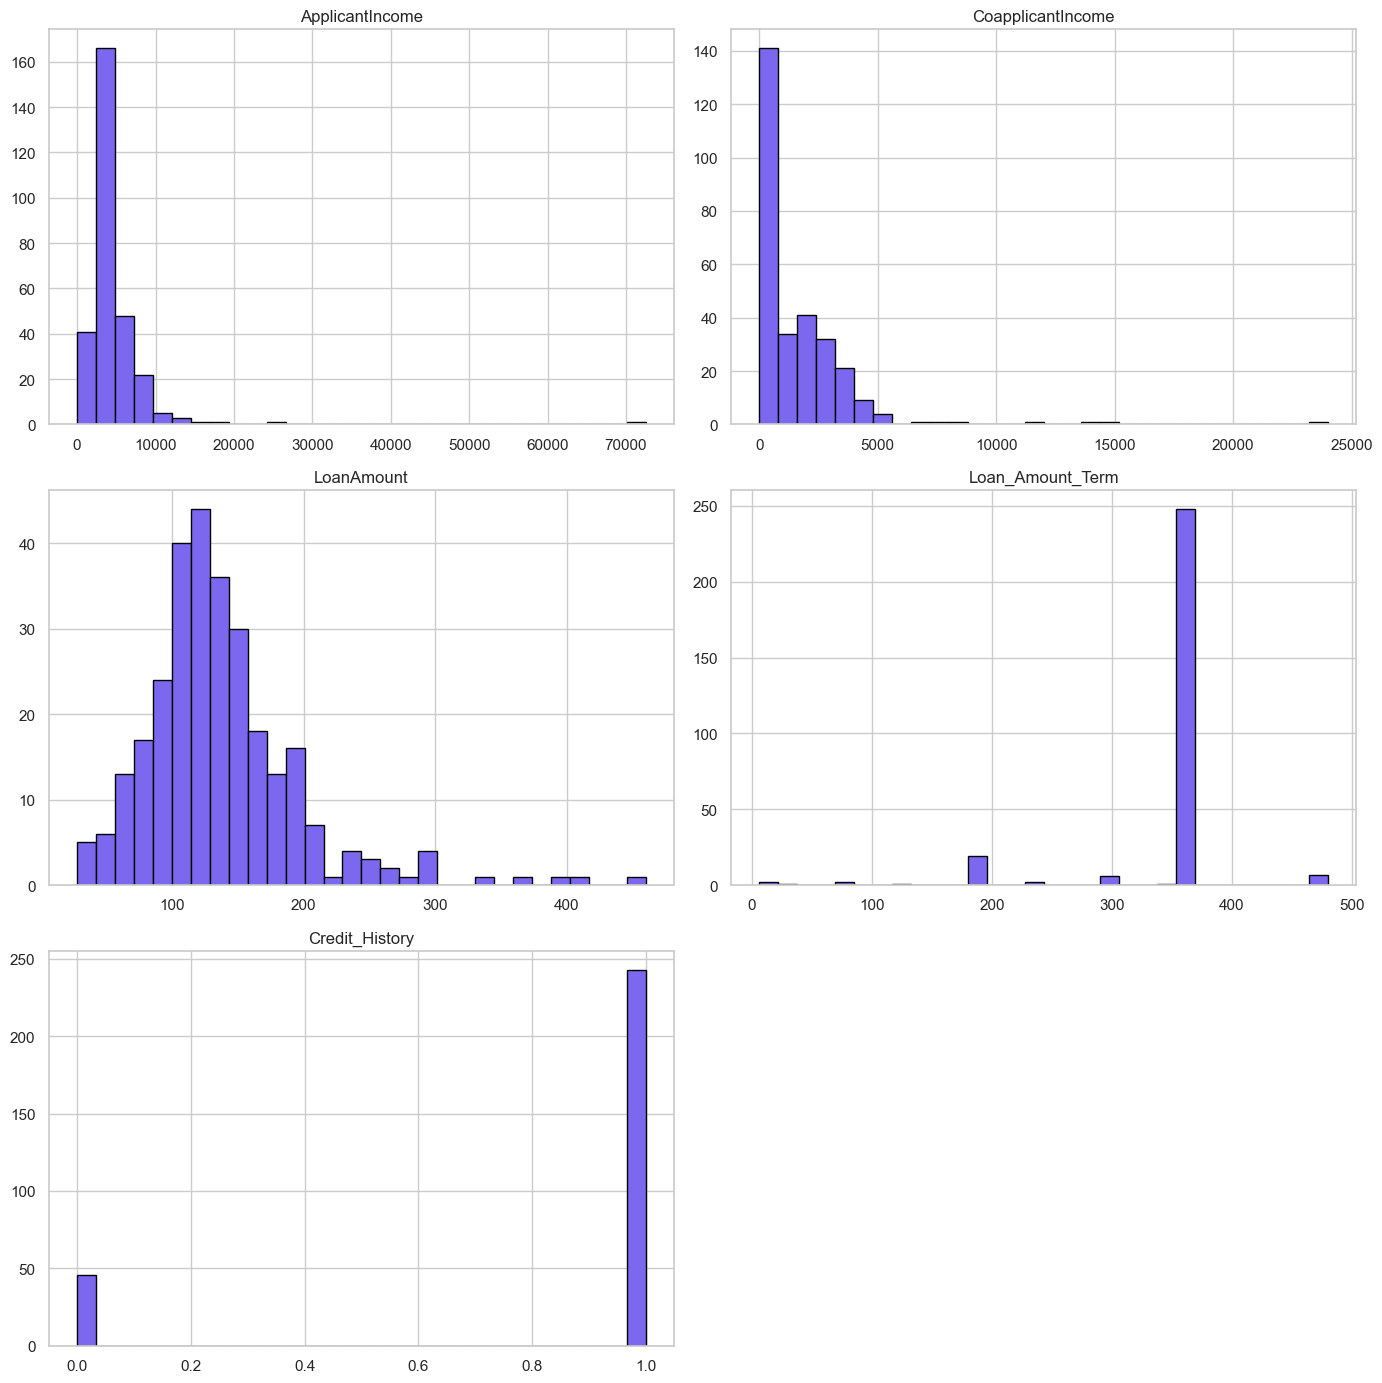

In [169]:
df[numeric_columns].hist(bins=30, figsize=(14,14), color='mediumslateblue', edgecolor='black')
plt.tight_layout()
plt.show()

#### Box Plots: Identify potential outliers and visualize the spread of data.

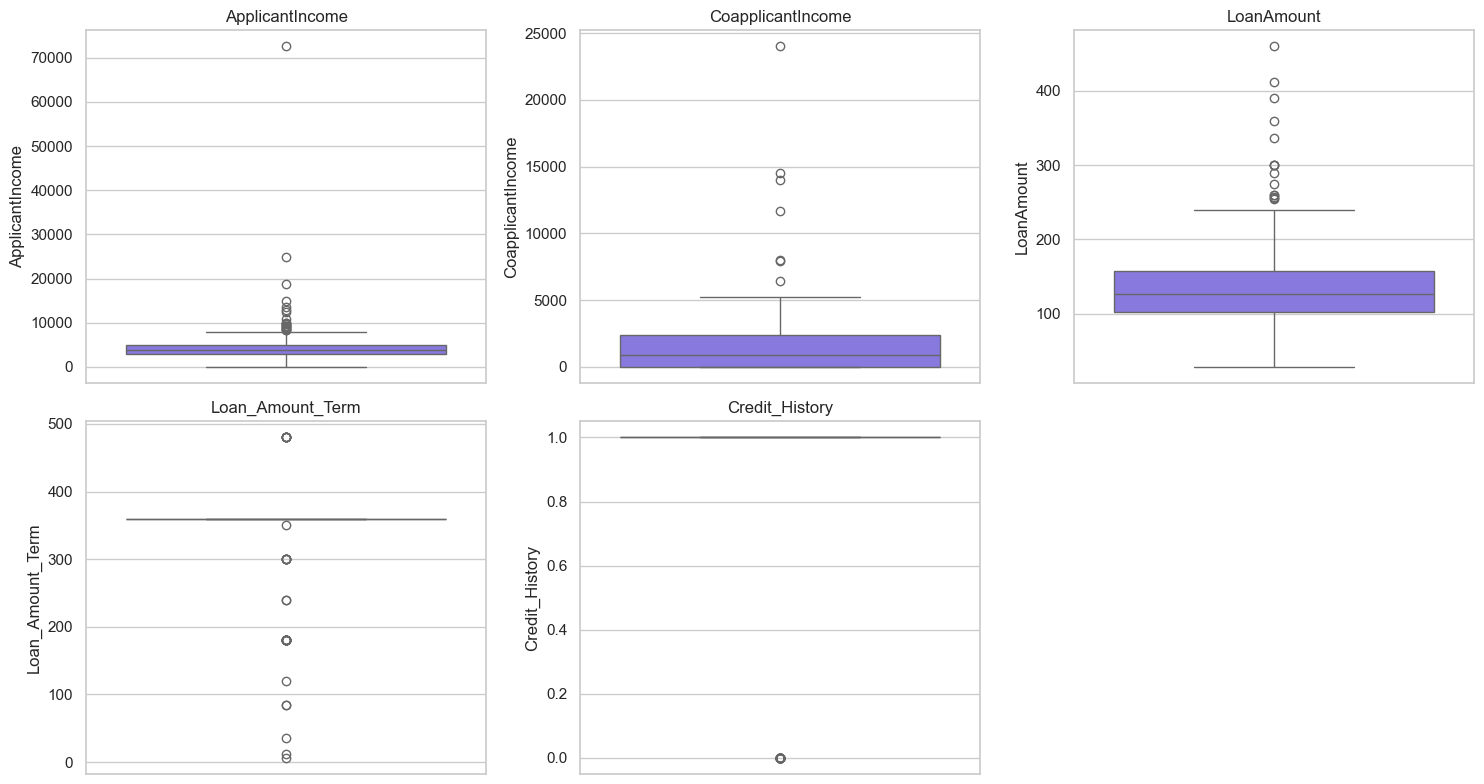

In [170]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='mediumslateblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [171]:
#Analyze categorical variables by creating the following plots:

categorical_columns = df.select_dtypes('object').columns
print(categorical_columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


#### Bar Charts: Visualize the frequency distribution of categorical variables.

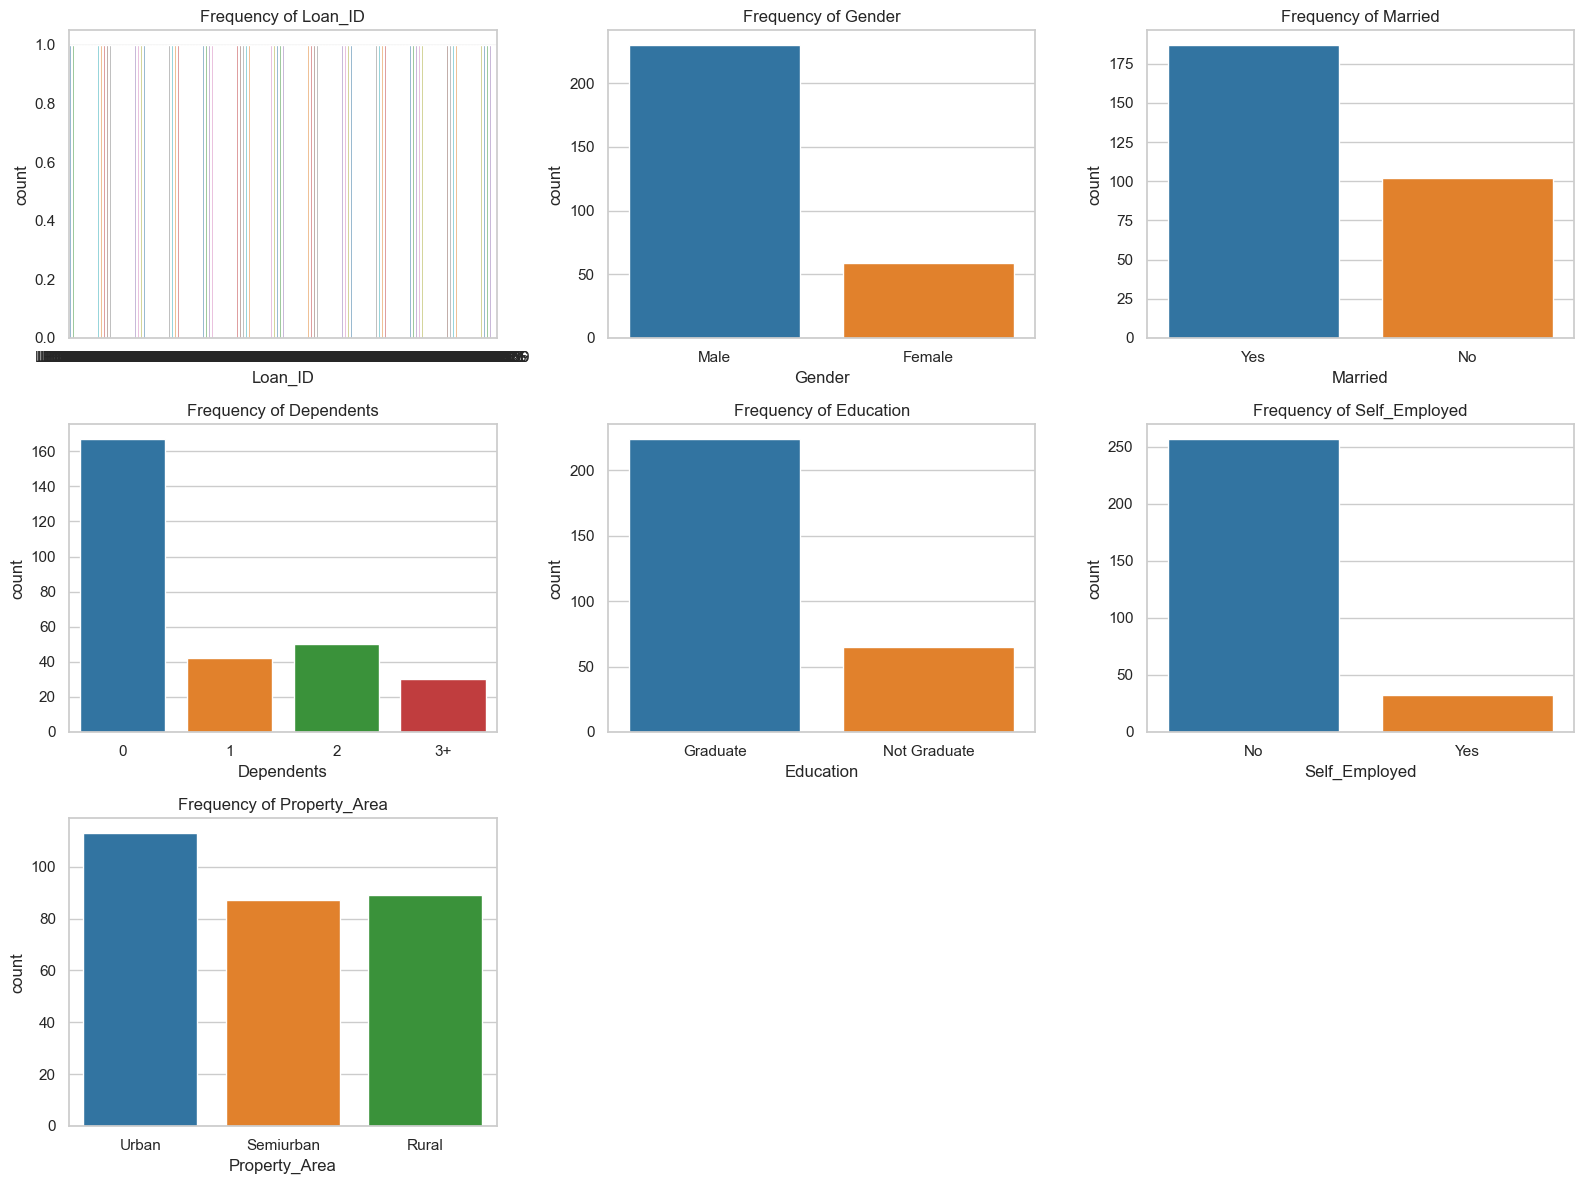

In [172]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette='tab10')
    plt.title(f'Frequency of {col}')
    
plt.tight_layout()
plt.show()

#### Pie Charts: Represent the composition of categorical variables.


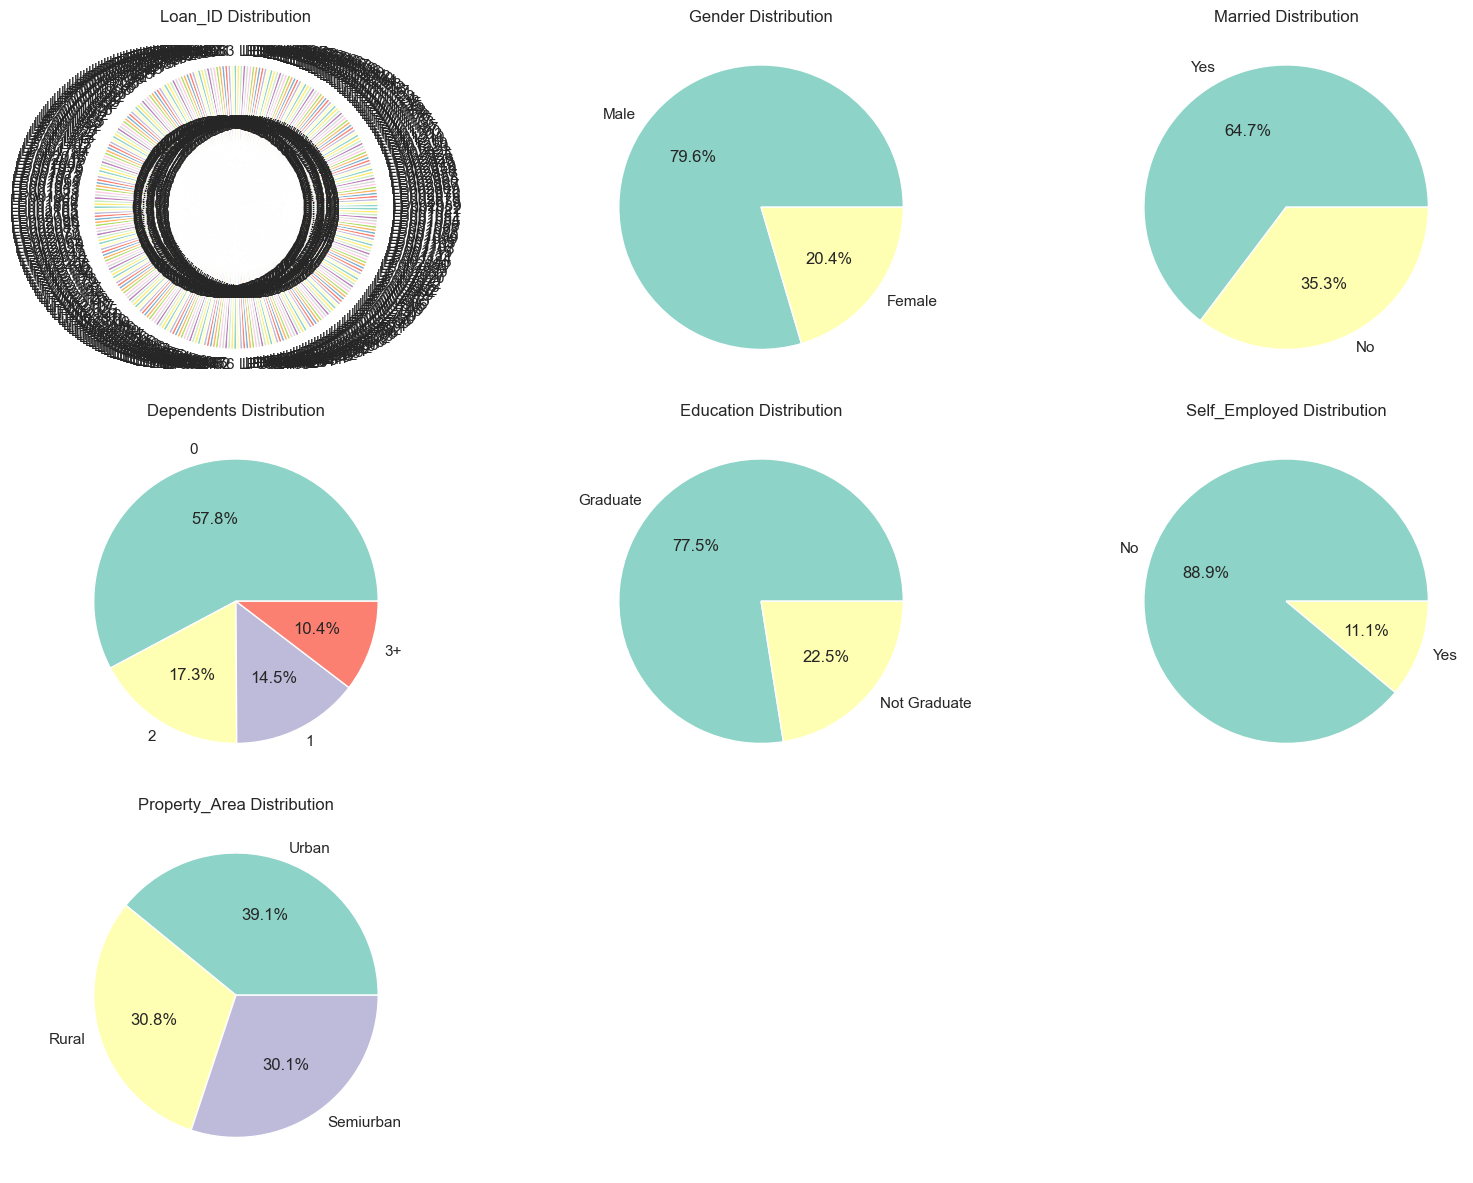

In [173]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Create scatter plots to explore relationships between pairs of numeric variables.  

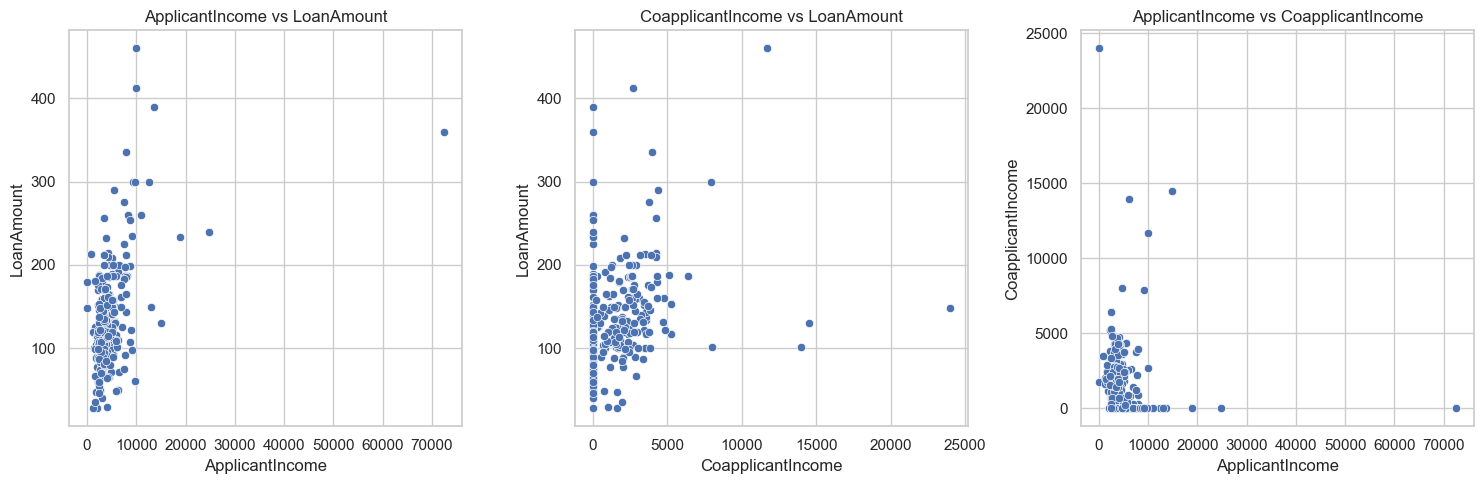

In [174]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'])
plt.title('ApplicantIncome vs LoanAmount')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['CoapplicantIncome'], y=df['LoanAmount'])
plt.title('CoapplicantIncome vs LoanAmount')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['ApplicantIncome'], y=df['CoapplicantIncome'])
plt.title('ApplicantIncome vs CoapplicantIncome')

plt.tight_layout()
plt.show()

#### Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously. 

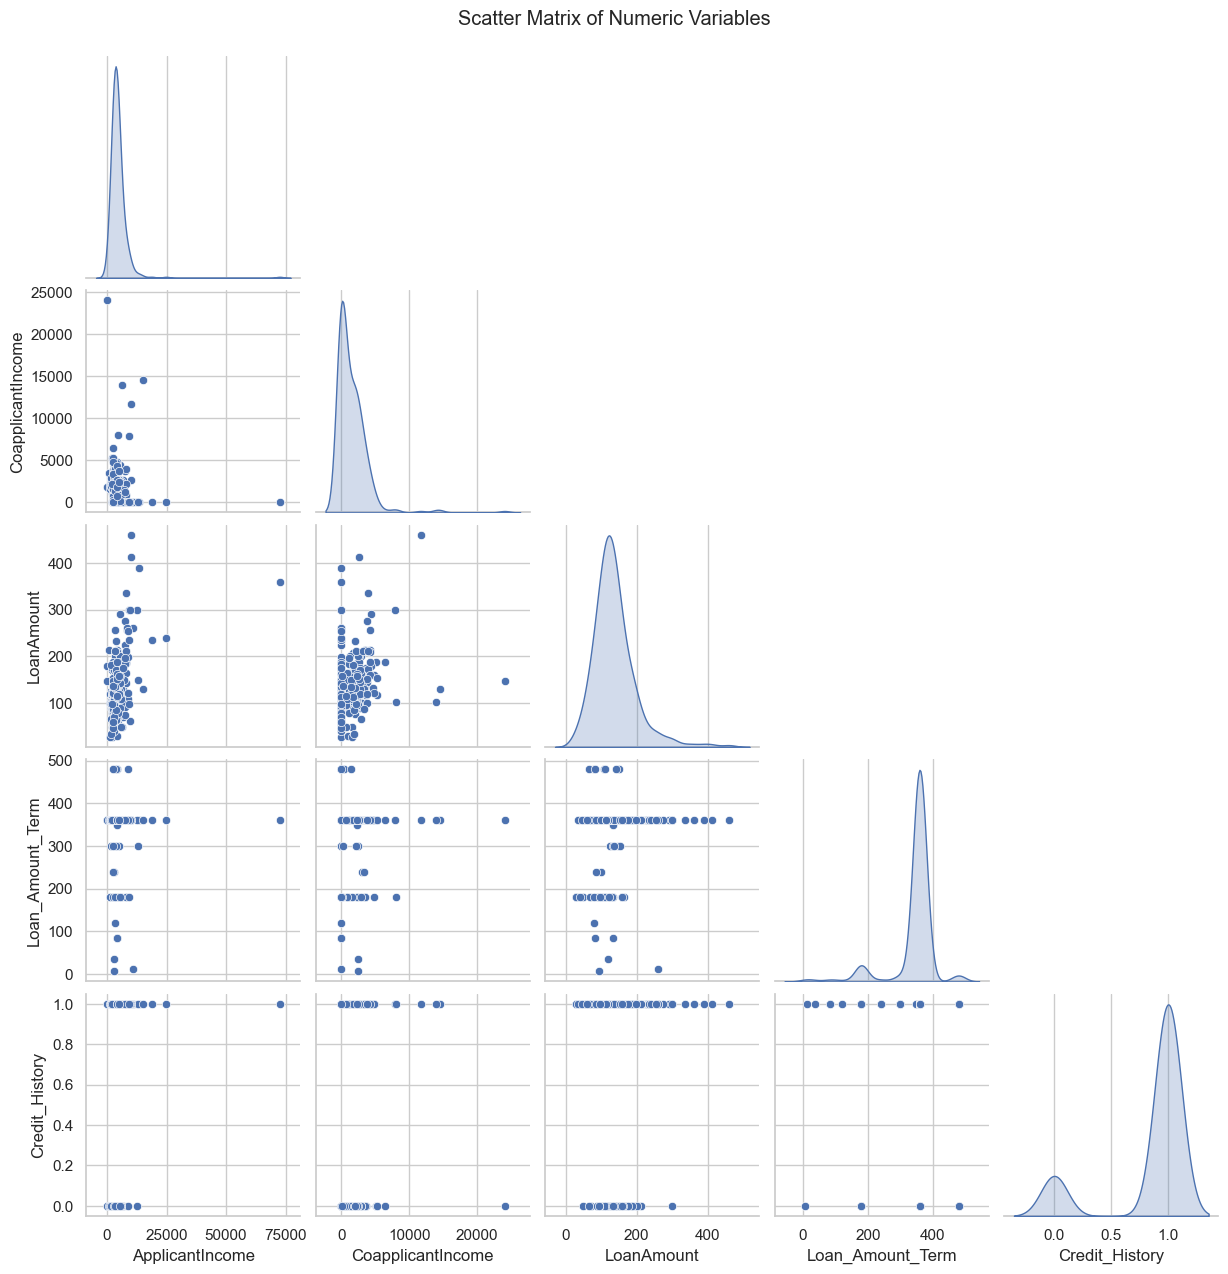

In [175]:
sns.pairplot(df[numeric_columns], corner=True, diag_kind="kde")
plt.suptitle("Scatter Matrix of Numeric Variables", y=1.02)
plt.show()

#### Investigate the relationship between categorical and numeric variables using box plots or violin plots.

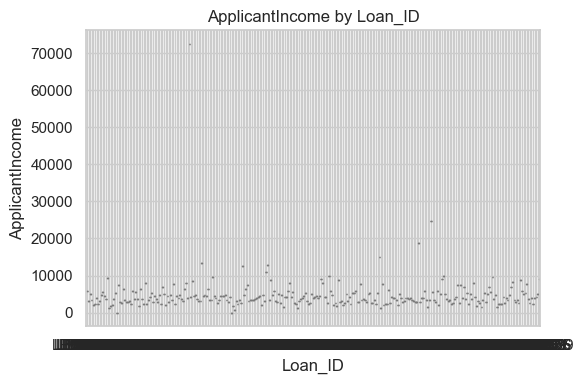

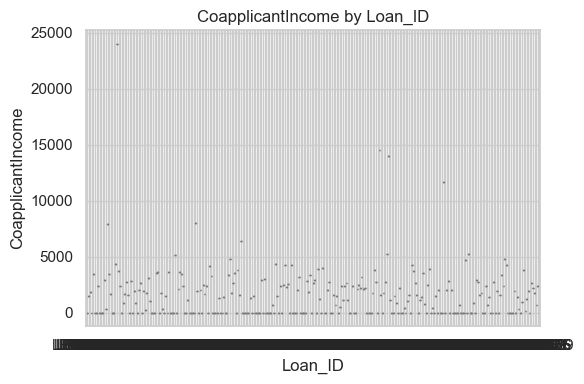

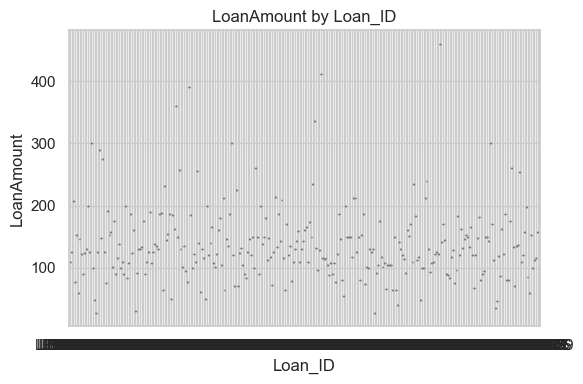

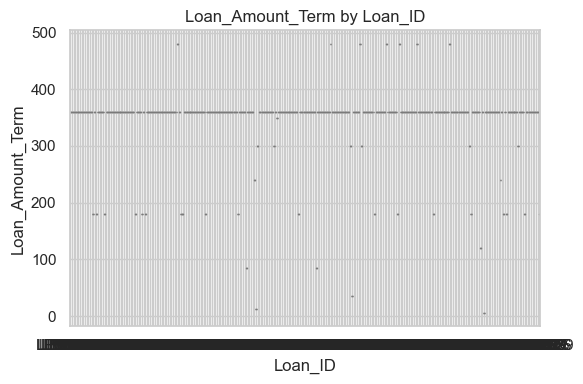

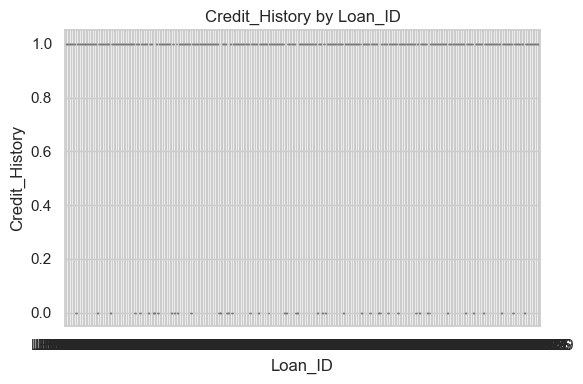

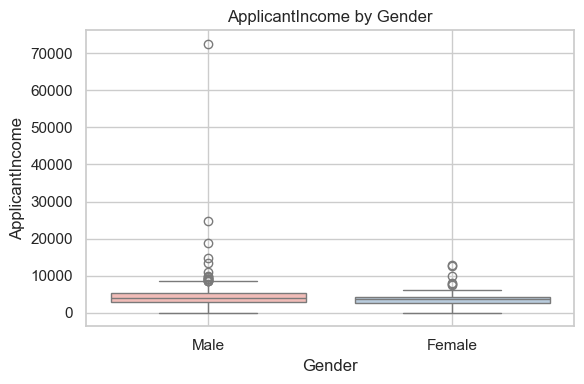

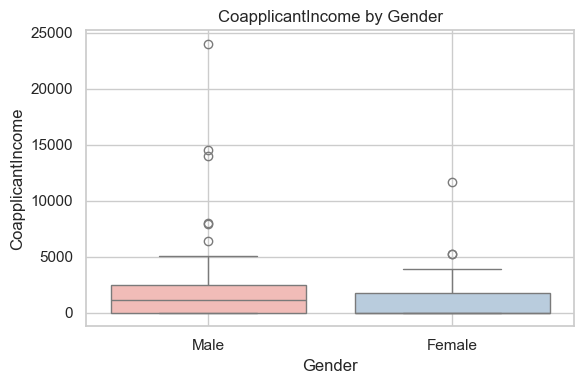

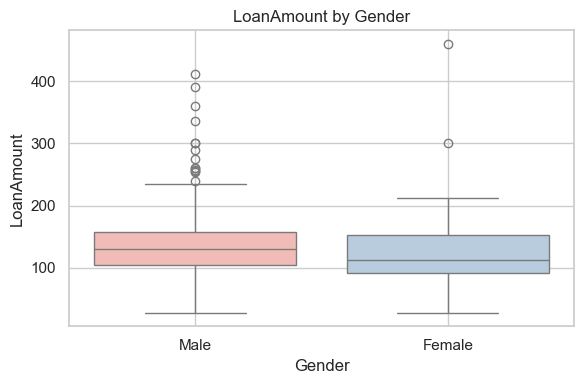

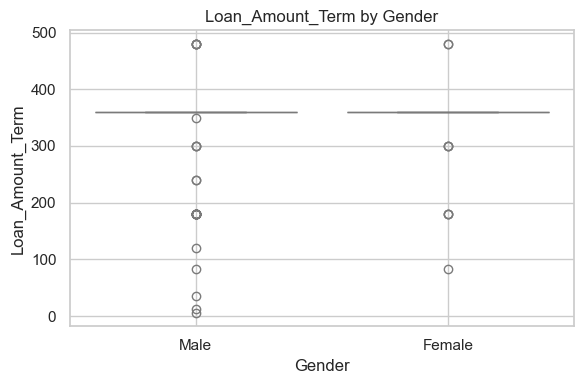

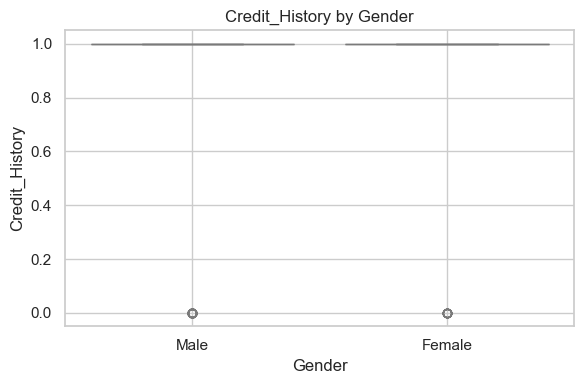

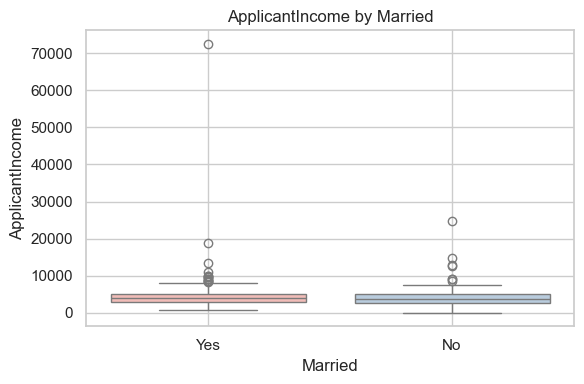

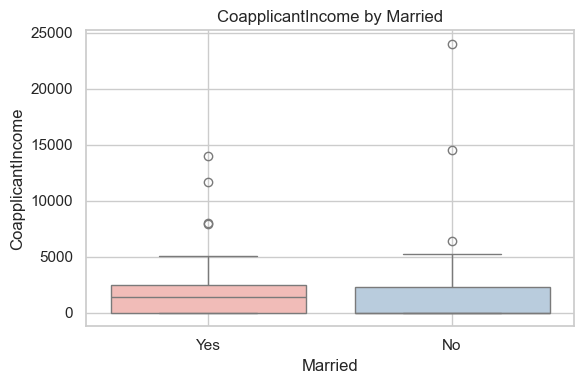

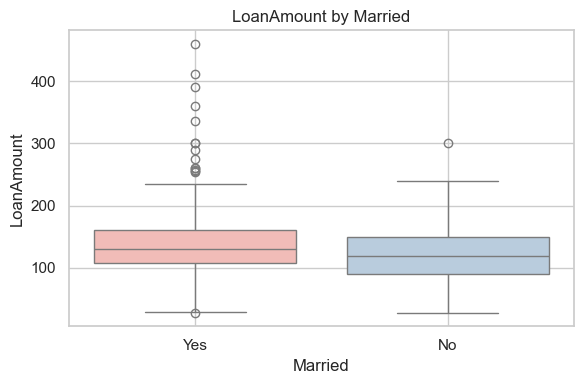

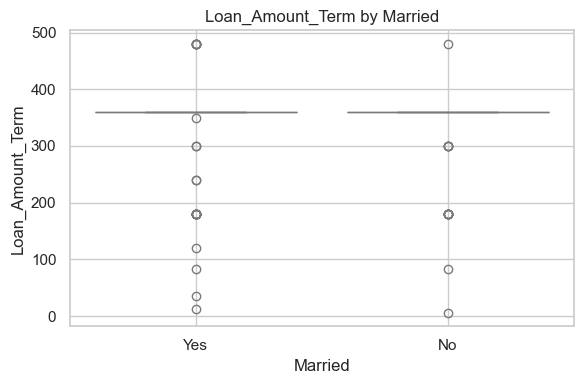

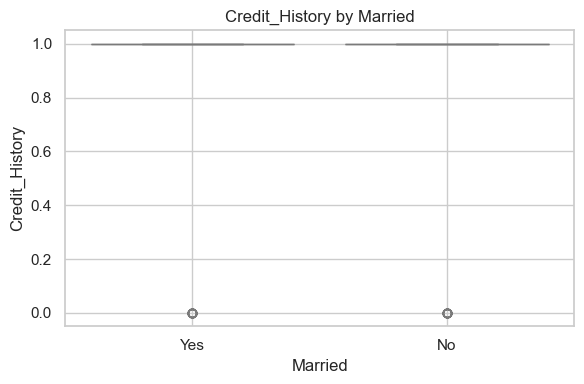

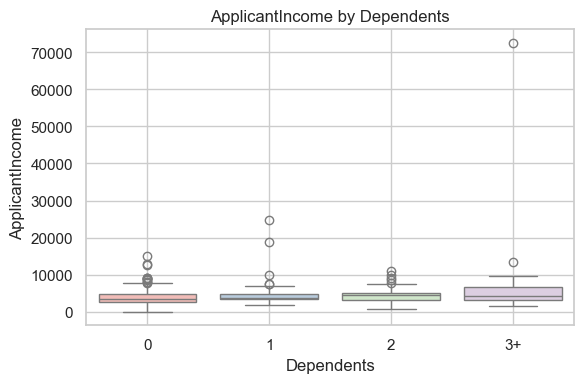

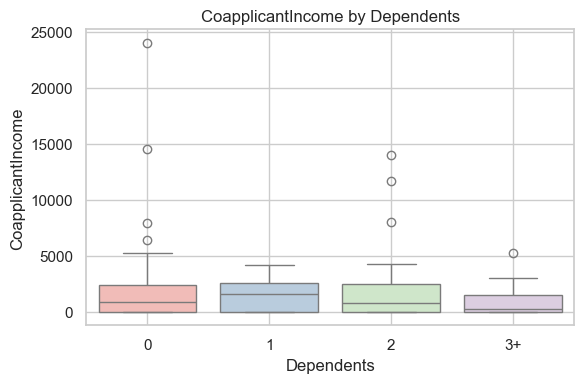

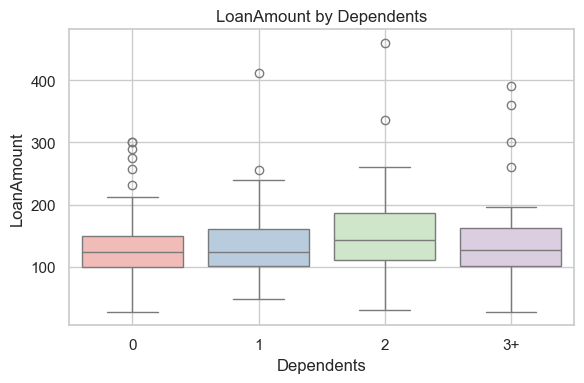

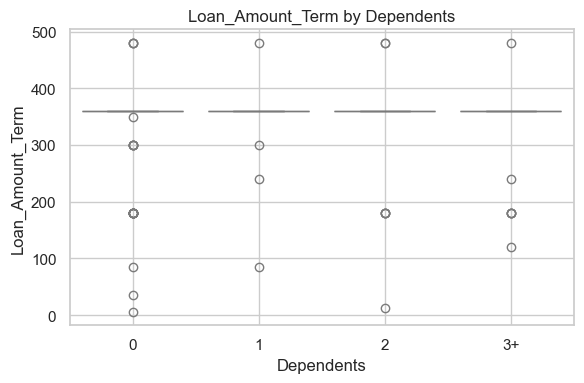

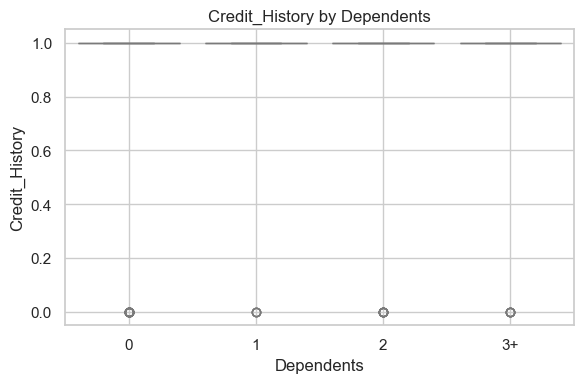

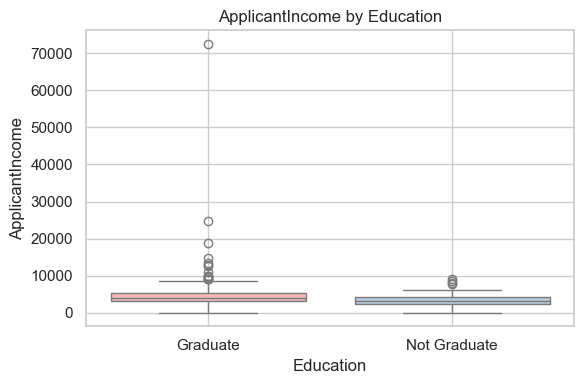

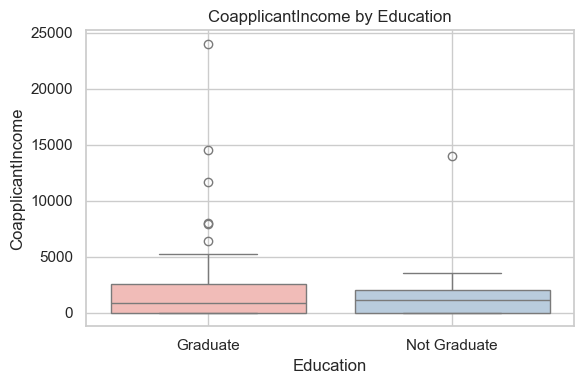

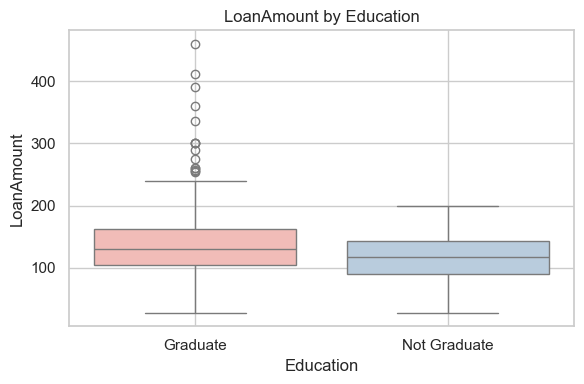

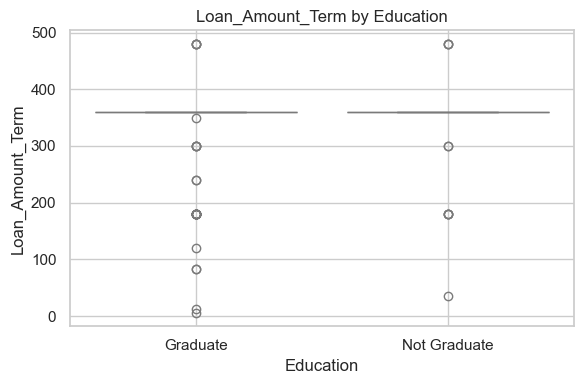

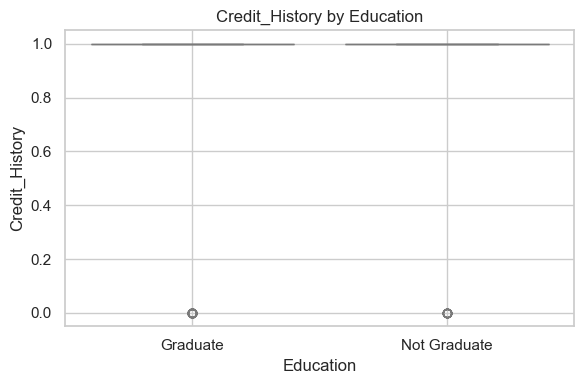

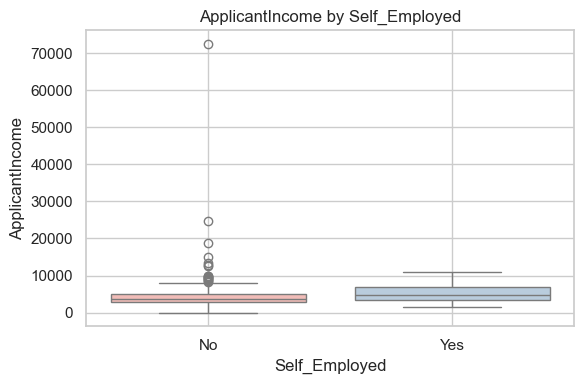

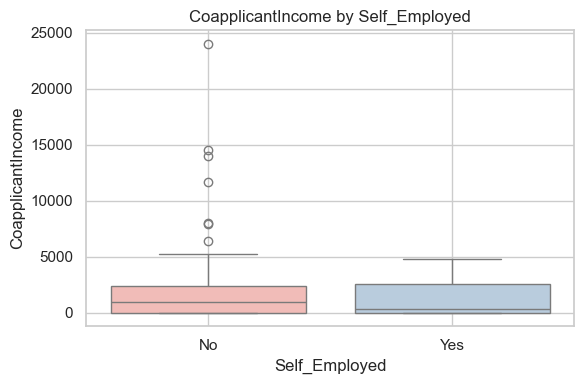

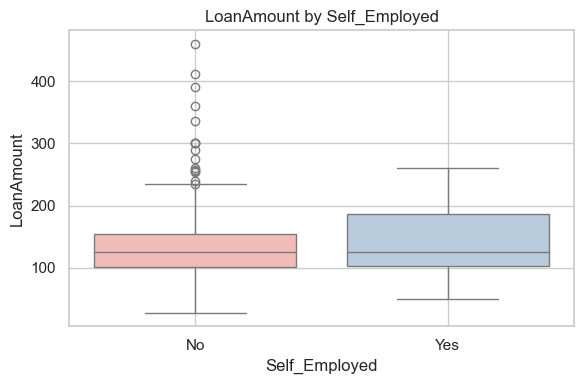

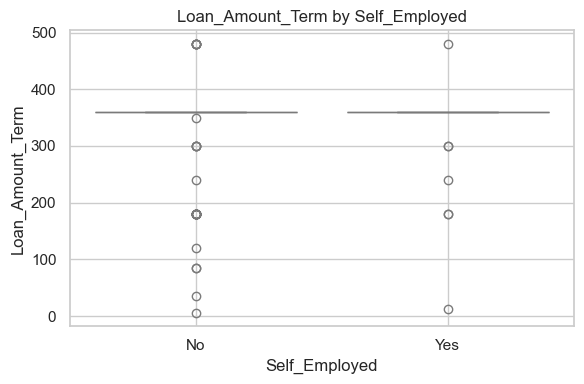

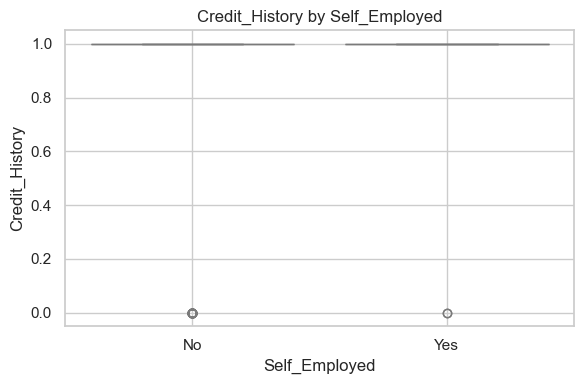

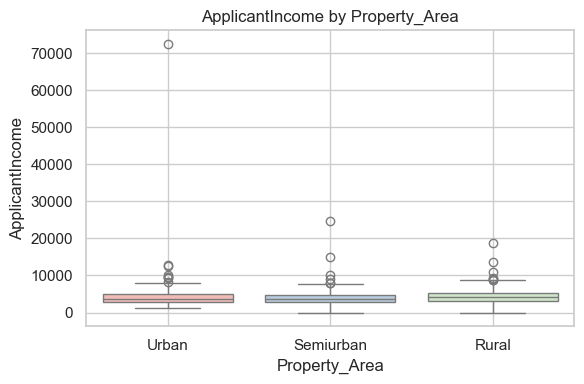

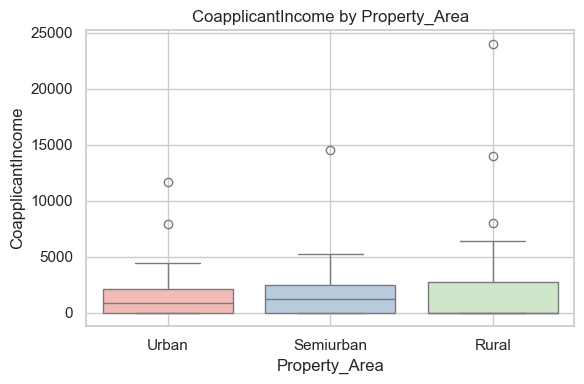

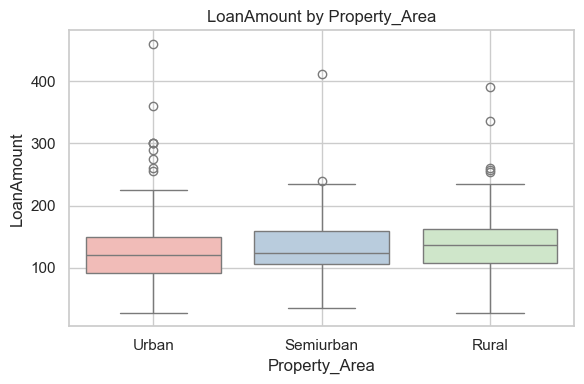

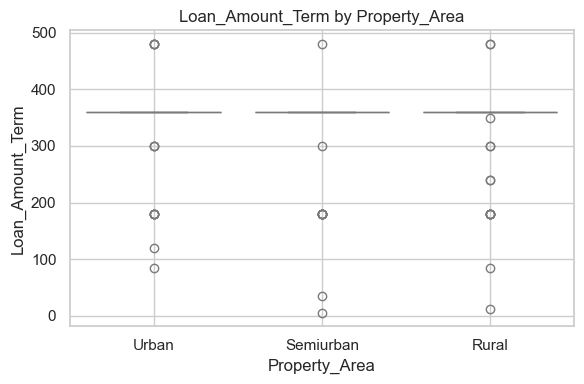

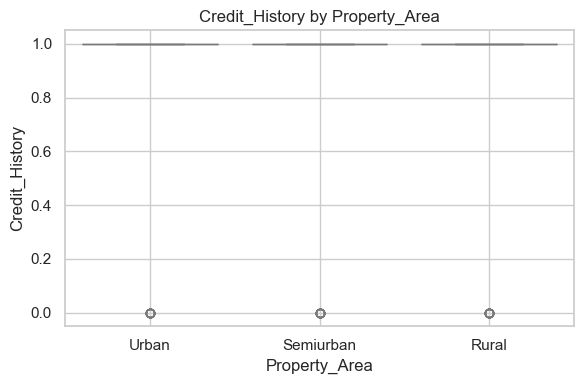

In [176]:
for cat in categorical_columns:
    for num in numeric_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')
        plt.title(f'{num} by {cat}')
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

### Multivariate Analysis

#### Perform a correlation analysis to identify relationships between numeric variables.

In [177]:
correlation = df[numeric_columns].corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.084353,0.445695,0.022727,0.086844
CoapplicantIncome,-0.084353,1.000000,0.230355,-0.000621,-0.094596
LoanAmount,0.445695,0.230355,1.000000,0.115750,-0.023894
Loan_Amount_Term,0.022727,-0.000621,0.115750,1.000000,-0.037971
Credit_History,0.086844,-0.094596,-0.023894,-0.037971,1.000000


#### Visualize correlations using a heatmap.

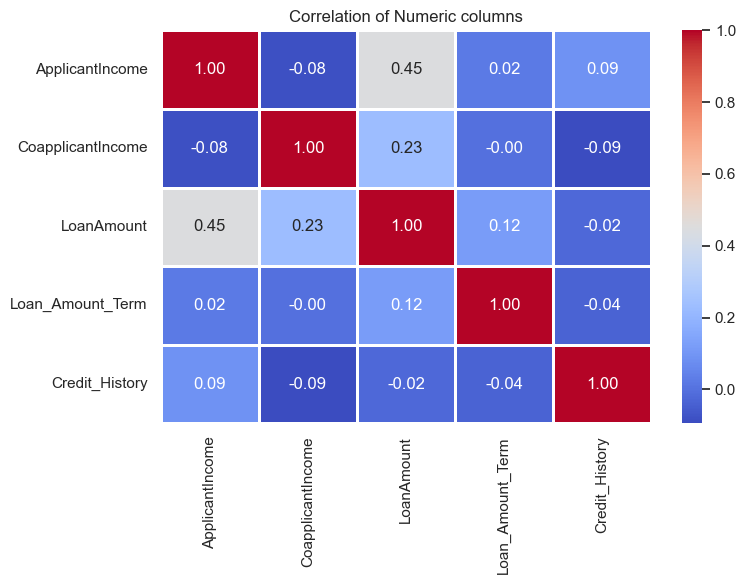

In [178]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation of Numeric columns')
plt.tight_layout()
plt.show()

#### Create a stacked bar chart to show the distribution of categorical variables across multiple categories.

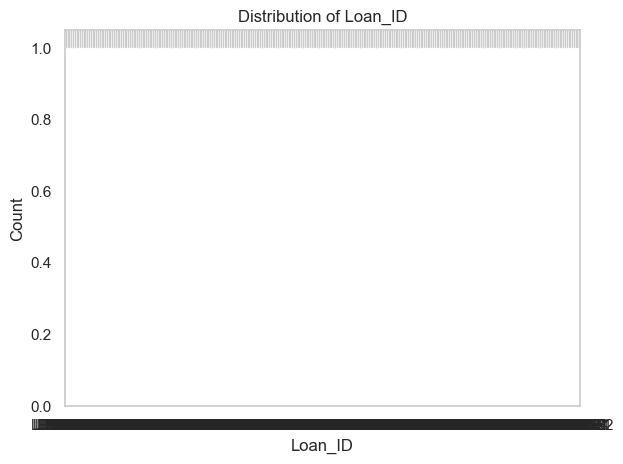

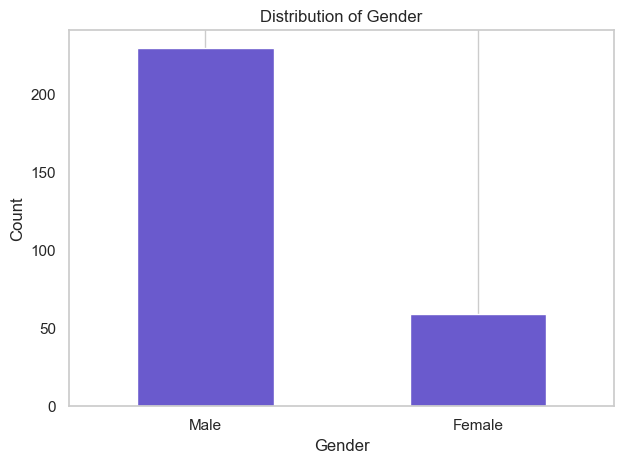

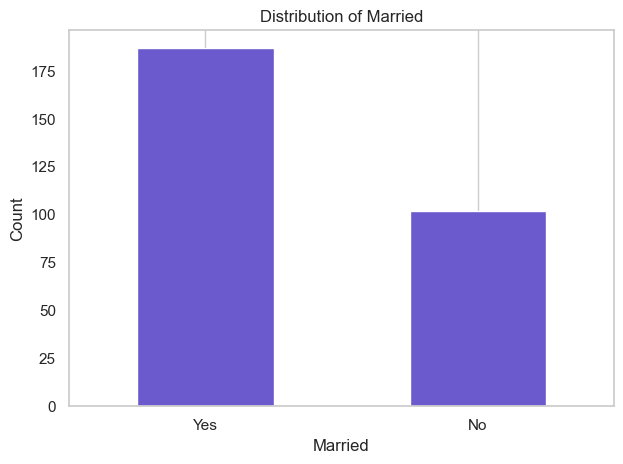

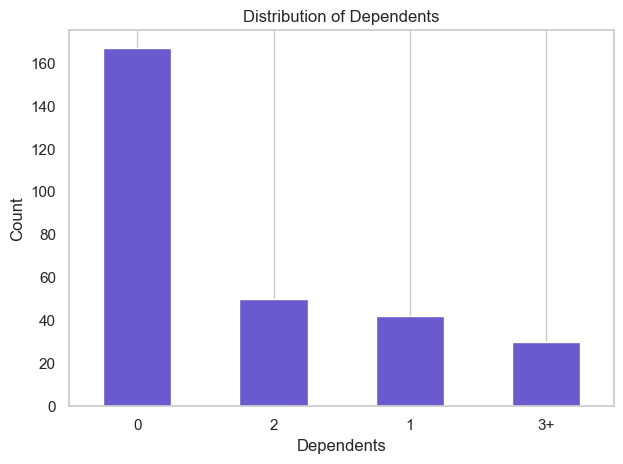

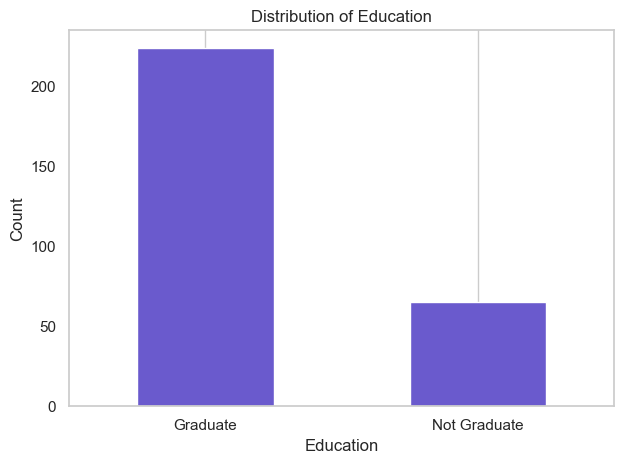

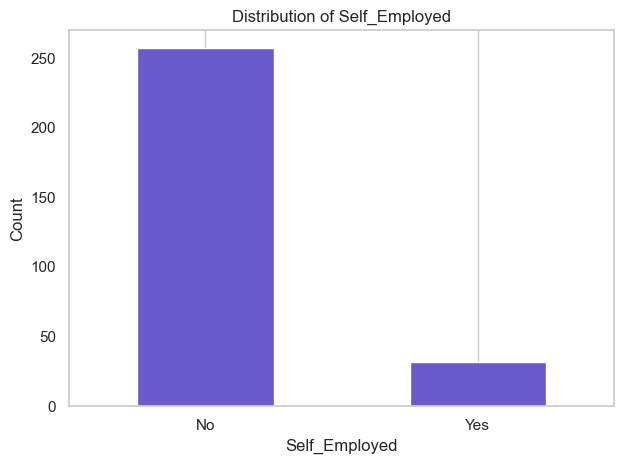

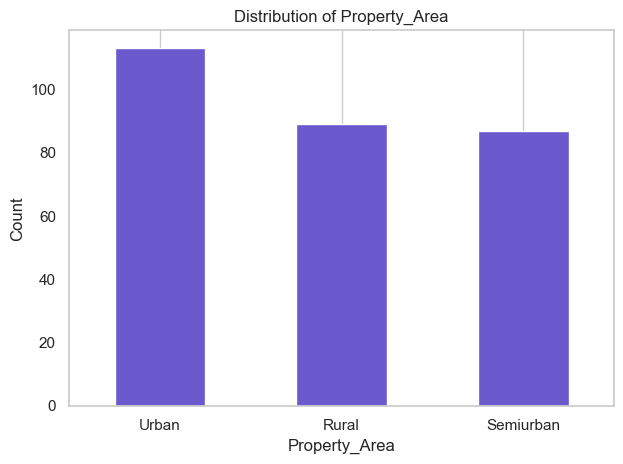

In [179]:
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar', color='slateblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()